In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
np.set_printoptions(suppress=True)
zero_one_colourmap = ListedColormap(('red', 'green'))
rcParams['figure.figsize'] = 14, 7
warnings.filterwarnings("ignore")
# rcParams['axes.facecolor'] = '#383838'

# Generate Data

In [3]:
X, y = make_circles(n_samples = 1000, 
                    factor=0.85, 
                    random_state=2021, 
                    noise=0.1)

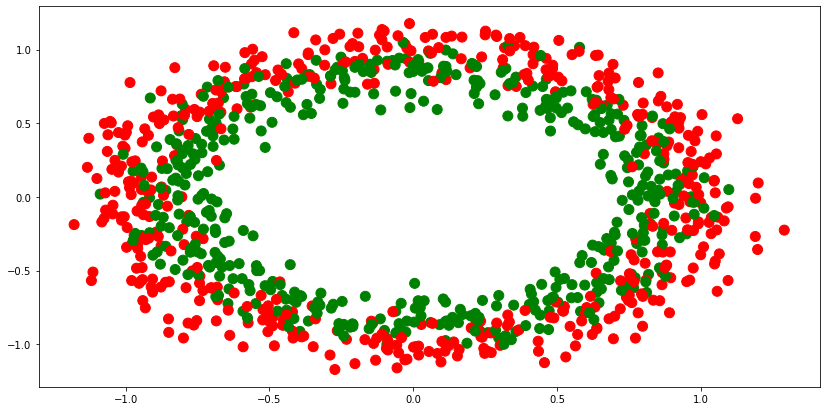

In [4]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()
# Here we have 2 input features x1 and x2 and one output feature y

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [7]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [8]:
def plot_performance(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper right')
  return plt.show()

# Model With Small Weights

In [9]:
model_1 = get_model("tanh")

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,471
Trainable params: 1,471
Non-trainable params: 0
_________________________________________________________________


In [11]:
small_weight = 0.000001 # very small value

In [12]:
initial_weights = model_1.get_weights()

In [14]:
initial_weights[0]
# we have 20 weithgs

array([[ 0.4321844 ,  0.29208678,  0.44634134, -0.23574671,  0.22515506,
         0.09978145, -0.24971485, -0.56150174, -0.067792  , -0.12050813],
       [ 0.04881483, -0.43875492, -0.5458    ,  0.1516459 , -0.6235328 ,
         0.51150626,  0.5811755 , -0.6762065 , -0.56431174, -0.5907633 ]],
      dtype=float32)

In [18]:
initial_weights[0] = small_weight * np.ones(initial_weights[0].shape)
# Numpy arry of ones and multiplied to the initial small weight assigned

In [19]:
initial_weights[0]

array([[0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001,
        0.000001, 0.000001, 0.000001, 0.000001],
       [0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001,
        0.000001, 0.000001, 0.000001, 0.000001]])

In [20]:
initial_weights[2] = small_weight * np.ones(initial_weights[2].shape)
initial_weights[4] = small_weight * np.ones(initial_weights[4].shape)
initial_weights[6] = small_weight * np.ones(initial_weights[6].shape)

In [21]:
model_1.set_weights(initial_weights)

In [22]:
model_1_history = model_1.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

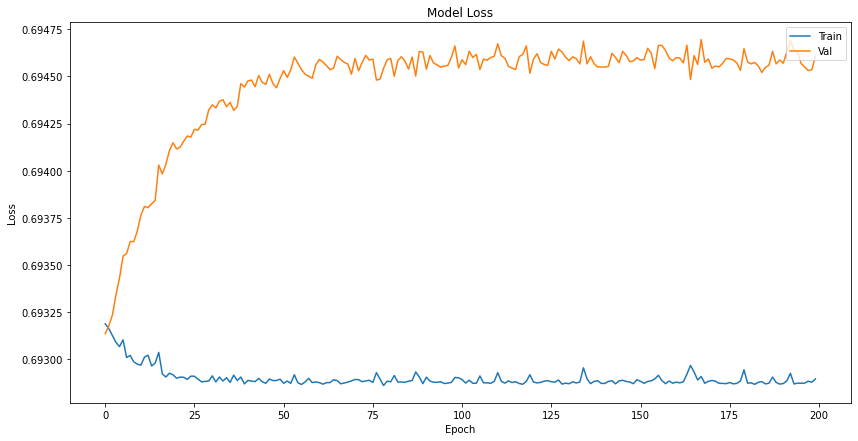

In [24]:
plot_performance(model_1_history)

# We can see with every epoch, Loss in increasing. Means model is not doing well.

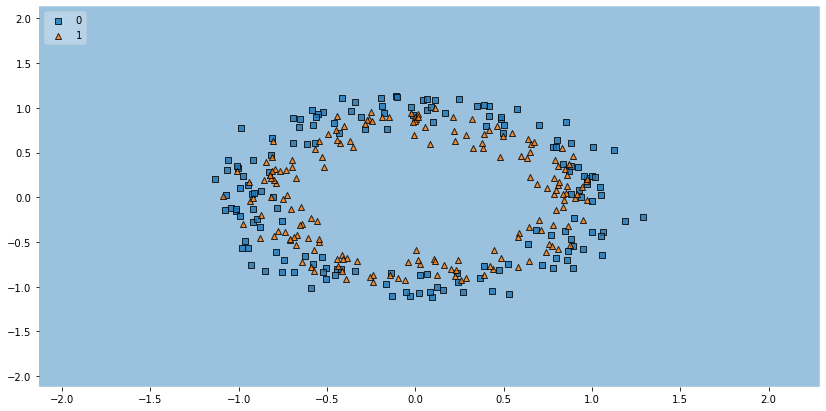

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_1, legend=2)
plt.show()

# Mostly model is not performing well. 
# This is the disadvantage of initilizing very small weights e. 0.0000001

# Model With Large Weights

In [26]:
model_2 = get_model("tanh")

In [27]:
initial_weights_2 = model_2.get_weights()

In [33]:
# setting large weights 50 here

initial_weights_2[0] = 50 * np.ones(initial_weights_2[0].shape)
initial_weights_2[2] = 50 * np.ones(initial_weights_2[2].shape)
initial_weights_2[4] = 50 * np.ones(initial_weights_2[4].shape)
initial_weights_2[6] = 50 * np.ones(initial_weights_2[6].shape)

In [34]:
model_2.set_weights(initial_weights_2)

In [30]:
model_2_history = model_2.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

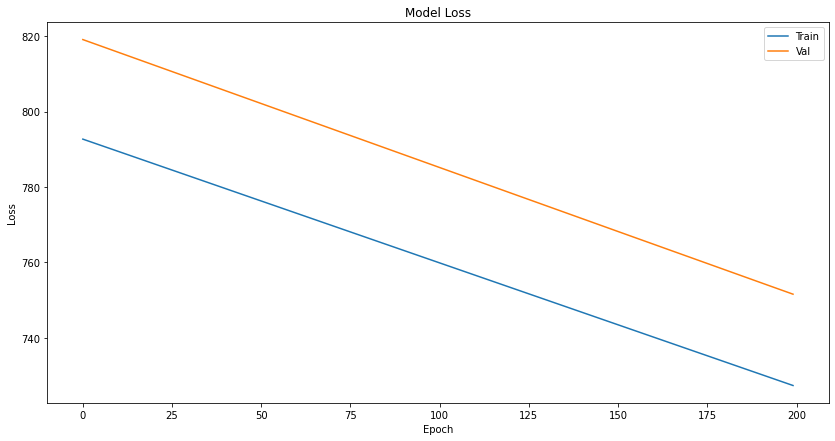

In [35]:
plot_performance(model_2_history)

# here we can see both train and test data losses are going down with increase in epochs.
# only disadvantage is, it will take a lot of time to converge to optimum weights

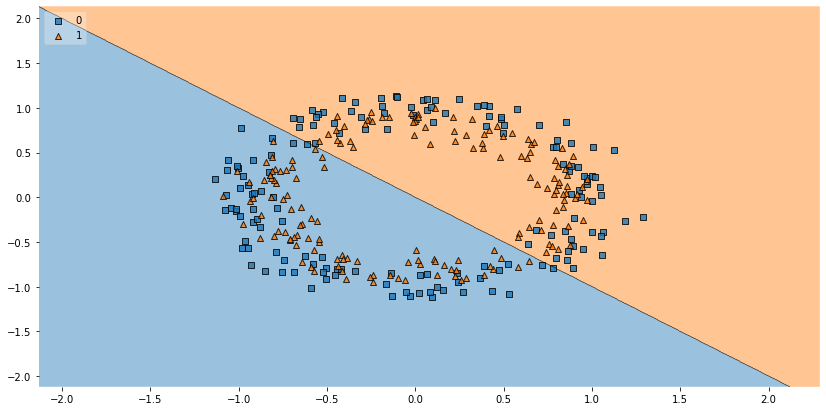

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_2, legend=2)
plt.show()

# performing better than pervioius, but classificaion is not that good

# Model With Xavier Initialization

In [38]:
# glorot_normal  is the keyword for Xavier Initializer

model = Sequential()
model.add(Dense(10,input_dim=2, activation="tanh", kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(Dense(32, activation = "tanh",kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(Dense(32, activation = "tanh",kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(Dense(1, activation="sigmoid",kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
xavier_weights = model.get_weights()

In [40]:
model_history = model.fit(X_train, y_train, epochs = 200, 
                          validation_data = (X_test, y_test))

Epoch 1/200
21/21 [==============================] - 0s 10ms/step - loss: 0.6989 - accuracy: 0.4985 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4746 - val_loss: 0.6946 - val_accuracy: 0.4879
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4761 - val_loss: 0.6937 - val_accuracy: 0.4909
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4940 - val_loss: 0.6919 - val_accuracy: 0.6000
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5015 - val_loss: 0.6928 - val_accuracy: 0.5333
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4821 - val_loss: 0.6935 - val_accuracy: 0.4818
Epoch 7/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.4955 - val_loss: 0.6922 - val_accuracy: 0.5424
Epoch 8/200


Epoch 59/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7164 - val_loss: 0.6307 - val_accuracy: 0.7091
Epoch 60/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6896 - val_loss: 0.6274 - val_accuracy: 0.7242
Epoch 61/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6910 - val_loss: 0.6330 - val_accuracy: 0.6727
Epoch 62/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6836 - val_loss: 0.6230 - val_accuracy: 0.7273
Epoch 63/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7194 - val_loss: 0.6201 - val_accuracy: 0.7273
Epoch 64/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7299 - val_loss: 0.6134 - val_accuracy: 0.7485
Epoch 65/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7373 - val_loss: 0.6160 - val_accuracy: 0.6879
Epoch 

21/21 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7642 - val_loss: 0.4853 - val_accuracy: 0.7515
Epoch 117/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7910 - val_loss: 0.4707 - val_accuracy: 0.7788
Epoch 118/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7627 - val_loss: 0.4984 - val_accuracy: 0.7394
Epoch 119/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7821 - val_loss: 0.4716 - val_accuracy: 0.7667
Epoch 120/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7612 - val_loss: 0.4858 - val_accuracy: 0.7545
Epoch 121/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7627 - val_loss: 0.4614 - val_accuracy: 0.7848
Epoch 122/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7731 - val_loss: 0.4716 - val_accuracy: 0.7636
Epoch 123/200

21/21 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7687 - val_loss: 0.4644 - val_accuracy: 0.7667
Epoch 174/200
21/21 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7821 - val_loss: 0.4668 - val_accuracy: 0.7515
Epoch 175/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7701 - val_loss: 0.4697 - val_accuracy: 0.7545
Epoch 176/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7731 - val_loss: 0.4717 - val_accuracy: 0.7727
Epoch 177/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7866 - val_loss: 0.4576 - val_accuracy: 0.7909
Epoch 178/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7806 - val_loss: 0.4621 - val_accuracy: 0.7727
Epoch 179/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7731 - val_loss: 0.4730 - val_accuracy: 0.7667
Epoch 180/200

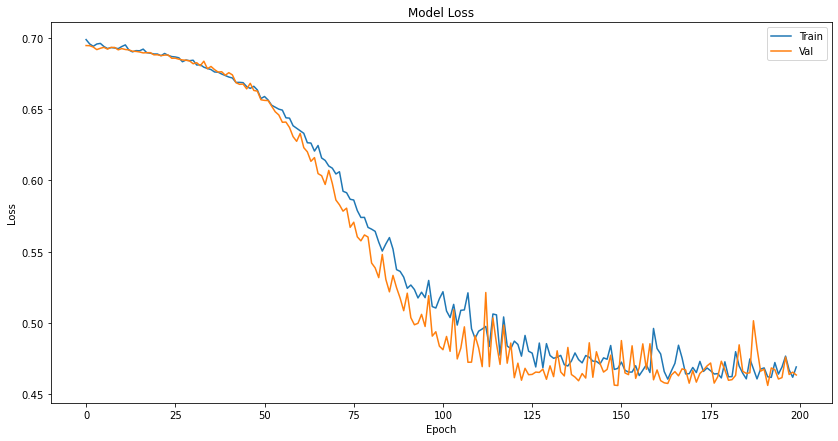

In [43]:
plot_performance(model_history)
# we can see with Xavier Initializer we see, decrease in losses with increase in Epochs,  in both training and test datasets
# this is the ideal scenario

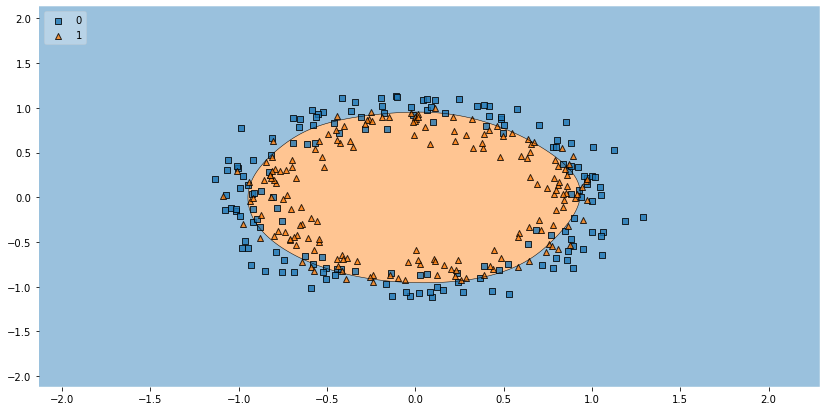

In [44]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# it able to leanr the patter
# Inside boundary = 1 and outside is = 0
# wiht Zavier it has done a good job, but not the best job